In [10]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# We'll use the diabetes dataset from the sklearn library
# We have to manually import de datasets module to do so
from sklearn.datasets import load_diabetes
diabetes_data = load_diabetes()
print(diabetes_data.DESCR) # We can view a summary about the data 

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

We use 10 feautures:
- age     age in years
- sex
- bmi     body mass index
- bp      average blood pressure
- s1      tc, total serum cholesterol
- s2      ldl, low-density lipoproteins
- s3      hdl, high-density lipoproteins
- s4      tch, total cholesterol / HDL
- s5      ltg, possibly log of serum triglycerides level
- s6      glu, blood sugar level

The target being a quantitative measure of diabetes progression one year after baseline

In [6]:
# We'll create a pandas dataframe to use the data
# We first create the dataframe by adding the Features or X-values
diabetes_df = pd.DataFrame(diabetes_data.data, 
                            columns=diabetes_data.feature_names)
# And we join the Y-value creating a new column called progression
diabetes_df['progression'] = diabetes_data.target

diabetes_df.head() # We can see that the values of the feauture look off
# That's because as the DESCR says
# Note: Each of these 10 feature variables have been mean centered and scaled 
# by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [8]:
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [7]:
# We check that there aren't any missing values
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          442 non-null    float64
 1   sex          442 non-null    float64
 2   bmi          442 non-null    float64
 3   bp           442 non-null    float64
 4   s1           442 non-null    float64
 5   s2           442 non-null    float64
 6   s3           442 non-null    float64
 7   s4           442 non-null    float64
 8   s5           442 non-null    float64
 9   s6           442 non-null    float64
 10  progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


<AxesSubplot:>

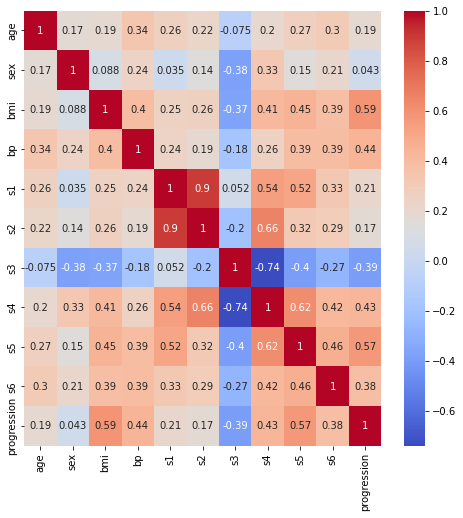

In [12]:
# Now well check the correlation matrix
corr = diabetes_df.corr()
plt.subplots(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
# Features that have a correlation over 0.5 with the targe value are
# the bmi, and s5.
# We can also see some features are highly correlated between each other
# Such as s1 and s2, and s1 and s4, s2 and s4.

We will first create a linear regression model using SKLearn and without feature selection.

In [13]:
# x values
x = diabetes_df.drop(['progression'], axis=1)

In [14]:
# y target
y = diabetes_df['progression']